In [48]:
import pandas as pd
import numpy as np


from sklearn.cluster import KMeans
import scipy.stats as stats
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import acquire as a
import prepare as p
import wrangle as w
import explore as exp
import evaluate as eva
import pretty as muah
import knear as k

import warnings
warnings.filterwarnings("ignore")

# 1
Using lemonade.csv dataset and focusing on continuous variables:

Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?


In [7]:
# read url into pandas
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'
df = pd.read_csv(url)

df.head()  # Display the first few rows of the DataFrame


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


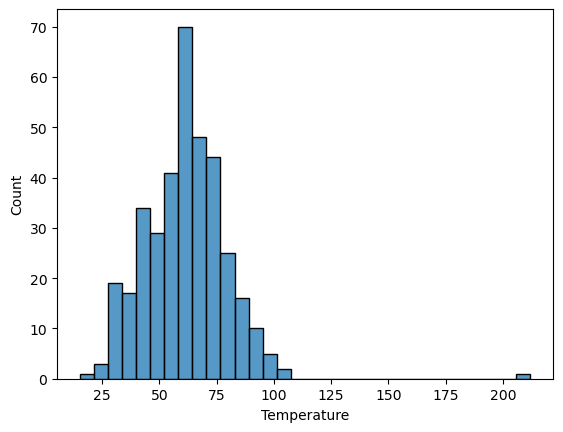

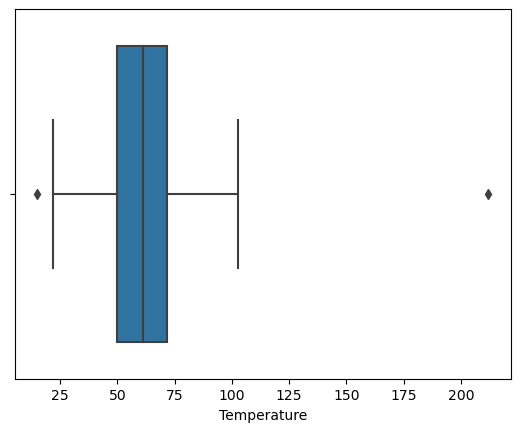

In [17]:
#visualize temperature
sns.histplot(data= df, x='Temperature')
plt.show()
sns.boxplot(data= df, x='Temperature')
plt.show()

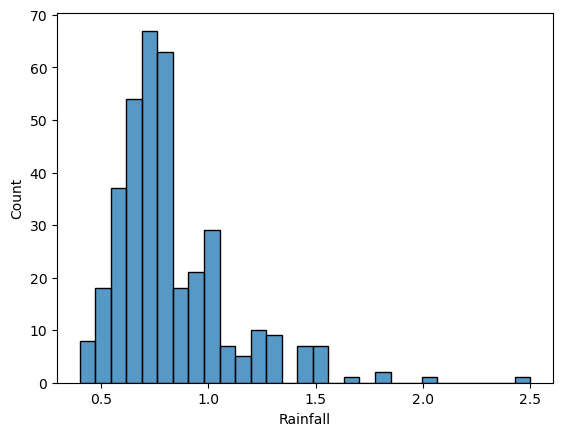

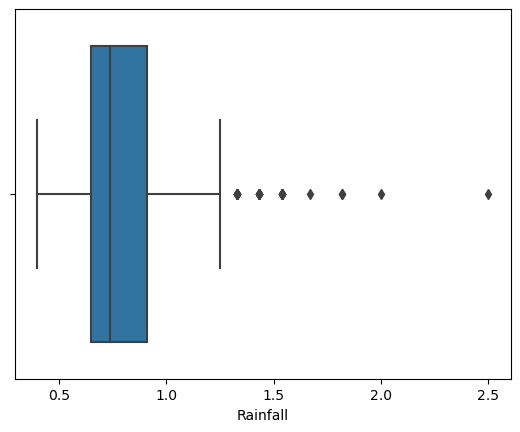

In [18]:
#visualize rainfall
sns.histplot(data= df, x='Rainfall')
plt.show()
sns.boxplot(data= df, x='Rainfall')
plt.show()

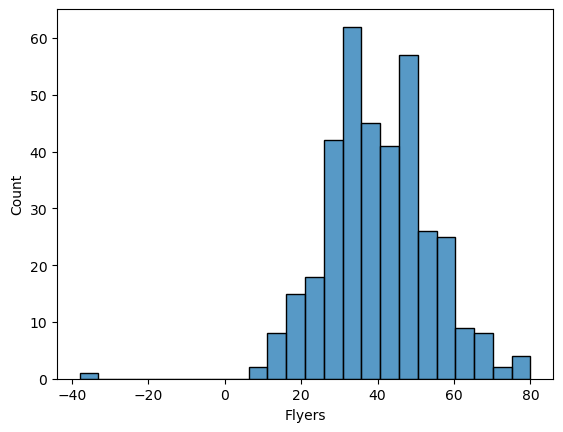

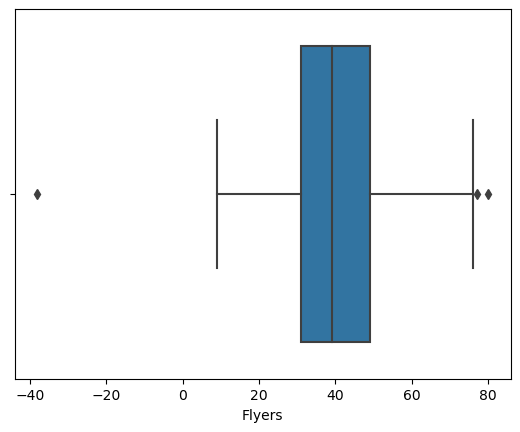

In [19]:
#visualize flyers
sns.histplot(data= df, x='Flyers')
plt.show()
sns.boxplot(data= df, x='Flyers')
plt.show()

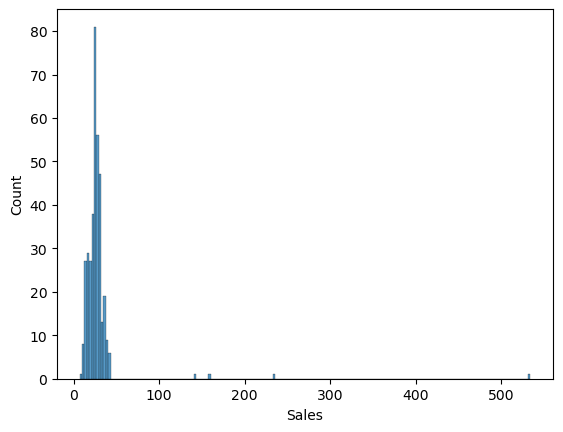

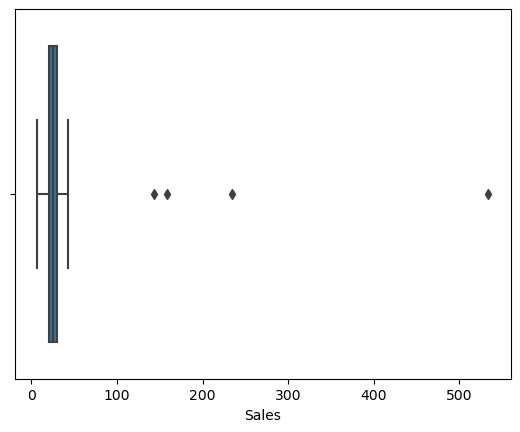

In [21]:
#visualize sales
sns.histplot(data= df, x='Sales')
plt.show()
sns.boxplot(data= df, x='Sales')
plt.show()

In [26]:
df.columns

Index(['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], dtype='object')

In [27]:
# Define a function to identify lower outliers using IQR Range Rule
def identify_lower_outliers(data, column, multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (multiplier * IQR)
    lower_outliers = data[data[column] < lower_bound]
    return lower_outliers

In [28]:
# temperature lower bounds
identify_lower_outliers(df, 'Temperature', multiplier=1.5 )

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


In [29]:
# rainfall lower bounds
identify_lower_outliers(df, 'Rainfall', multiplier=1.5 )

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [30]:
# Flyers lower bounds
identify_lower_outliers(df, 'Flyers', multiplier=1.5 )

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [31]:
# sales lower bounds
identify_lower_outliers(df, 'Sales', multiplier=1.5 )

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?


In [32]:
# Define a function to identify upper outliers using IQR Range Rule
def identify_upper_outliers(data, column, multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + (multiplier * IQR)
    upper_outliers = data[data[column] > upper_bound]
    return upper_outliers

In [33]:
# temperature upper bounds
identify_upper_outliers(df, 'Temperature', multiplier=1.5)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [34]:
# rainfall upper bounds
identify_upper_outliers(df, 'Rainfall', multiplier=1.5)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
11,1/12/17,Thursday,38.2,1.33,16,0.5,14
12,1/13/17,Friday,37.5,1.33,19,0.5,15
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14


In [35]:
# flyers upper bounds
identify_upper_outliers(df, 'Flyers', multiplier=1.5)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
194,7/14/17,Friday,92.0,0.50,80,0.5,40


In [36]:
# sales upper bounds
identify_upper_outliers(df, 'Sales', multiplier=1.5)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


In [37]:
df.shape

(365, 7)

Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?


In [38]:
# Define a function to identify lower outliers using IQR Range Rule and lower bounds
def identify_lower_outliers_extended(data, column, multiplier=3):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (multiplier * IQR)
    lower_outliers = data[data[column] < lower_bound]
    return lower_outliers

In [39]:
# temperature lower bounds extended
identify_lower_outliers_extended(df, 'Temperature', multiplier=3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [40]:
# rainfall lower bounds extended
identify_lower_outliers_extended(df, 'Rainfall', multiplier=3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [41]:
# flyers lower bounds extended
identify_lower_outliers_extended(df, 'Flyers', multiplier=3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [42]:
# sales lower bounds extended
identify_lower_outliers_extended(df, 'Sales', multiplier=3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [43]:
# Define a function to identify upper outliers using IQR Range Rule and upper bounds
def identify_upper_outliers_extended(data, column, multiplier=3):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + (multiplier * IQR)
    upper_outliers = data[data[column] > upper_bound]
    return upper_outliers

In [44]:
# temperature upper bounds extended
identify_upper_outliers_extended(df, 'Temperature', multiplier=3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [45]:
# rainfall upper bounds extended
identify_upper_outliers_extended(df, 'Rainfall', multiplier=3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [46]:
# flyers upper bounds extended
identify_upper_outliers_extended(df, 'Flyers', multiplier=3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


In [47]:
# sales upper bounds extended
identify_upper_outliers_extended(df, 'Sales', multiplier=3)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


# 2
Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:



In [49]:
stats.shapiro(df.Temperature)

ShapiroResult(statistic=0.9153037071228027, pvalue=1.8321322649110516e-13)

In [50]:
stats.shapiro(df.Rainfall)

ShapiroResult(statistic=0.8509275913238525, pvalue=3.7519820706996765e-18)

In [51]:
stats.shapiro(df.Flyers)

ShapiroResult(statistic=0.9747121930122375, pvalue=5.325806796463439e-06)

In [52]:
stats.shapiro(df.Sales)

ShapiroResult(statistic=0.20651865005493164, pvalue=1.5745407468407645e-36)

- all of them are normally distributed

Use a 2 sigma decision rule to isolate the outliers.



In [53]:
# Define a function to identify outliers in normally distributed columns using 2 sigma rule
def identify_outliers_2sigma(data, column):
    mean = data[column].mean()
    std = data[column].std()
    lower_bound = mean - (2 * std)
    upper_bound = mean + (2 * std)
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [54]:
# temperature 2 sigma
identify_outliers_2sigma(df, 'Temperature')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21
166,6/16/17,Friday,99.3,0.47,77,0.5,41
176,6/26/17,Monday,102.6,0.47,60,0.5,42
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
190,7/10/17,Monday,98.0,0.49,66,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
202,7/22/17,Saturday,99.6,0.47,49,0.5,42
207,7/27/17,Thursday,97.9,0.47,74,0.5,43
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [55]:
# rainfall 2 sigma
identify_outliers_2sigma(df, 'Rainfall')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12
15,1/16/17,Monday,30.6,1.67,24,0.5,12
16,1/17/17,Tuesday,32.2,1.43,26,0.5,14
19,1/20/17,Friday,31.6,1.43,20,0.5,12
23,1/24/17,Tuesday,28.6,1.54,20,0.5,12
337,12/4/17,Monday,34.9,1.54,16,0.5,13
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10


In [56]:
# flyers 2 sigma
identify_outliers_2sigma(df, 'Flyers')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
166,6/16/17,Friday,99.3,0.47,77,0.5,41
170,6/20/17,Tuesday,85.1,0.54,70,0.5,37
171,6/21/17,Wednesday,94.3,0.47,76,0.5,41
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
194,7/14/17,Friday,92.0,0.50,80,0.5,40
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41
203,7/23/17,Sunday,89.1,0.51,72,0.5,37
204,7/24/17,Monday,83.5,0.57,69,0.5,35
207,7/27/17,Thursday,97.9,0.47,74,0.5,43


In [57]:
# sales 2 sigma
identify_outliers_2sigma(df, 'Sales')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534


Do these make sense?
Should certain outliers be kept or removed?

- 38 flyers should be removed, and possibly the 534 and 235 sales

# 3
Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [58]:
# Define a function to identify outliers in normally distributed columns using 3 sigma rule
def identify_outliers_3sigma(data, column):
    mean = data[column].mean()
    std = data[column].std()
    lower_bound = mean - (3 * std)
    upper_bound = mean + (3 * std)
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [59]:
# temperature 3 sigma
identify_outliers_3sigma(df, 'Temperature')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [60]:
# rainfall 3 sigma
identify_outliers_3sigma(df, 'Rainfall')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
15,1/16/17,Monday,30.6,1.67,24,0.5,12
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10
343,12/10/17,Sunday,31.3,1.82,15,0.5,11
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [61]:
# flyers 3 sigma
identify_outliers_3sigma(df, 'Flyers')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


In [62]:
# sales 3 sigma
identify_outliers_3sigma(df, 'Sales')

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,7/1/17,Saturday,102.9,0.47,59,0.5,143
182,7/2/17,Sunday,93.4,0.51,68,0.5,158
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534
